<a href="https://colab.research.google.com/github/Lgvalia/MIT-Soviet-buildings-classification/blob/main/MIT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
train_folder = '/content/drive/MyDrive/MIT_Project/data/New Soviet Symbol Data/train'
test_folder =  '/content/drive/MyDrive/MIT_Project/data/New Soviet Symbol Data/test'

In [ ]:
# Edited by Ahmed

from PIL import Image
import os
import numpy as np
from torchvision import transforms

images = []
labels = []
i=0
img_tranform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((1024, 1024))
])

#train data list
for filename in sorted(os.listdir(train_folder)):
  if filename[-3:]=='txt':
    with open(os.path.join(train_folder, filename)) as f:
      labels.append(f.read())
  else:
    img = Image.open(os.path.join(train_folder, filename))
    img_tensor = img_tranform(img)
    images.append(img_tensor)
    # print(img.size)
    i+=1
    # print(i)

img_lab_train = []
for i in range(len(images)):
  lst = []
  lst.append(images[i])
  lst.append((int(labels[i].split(" ")[0]), [float(e) for e in labels[i].split(" ")[1:]]))
  img_lab_train.append(lst)


#test data list
for filename in sorted(os.listdir(test_folder)):
  if filename[-3:]=='txt':
    with open(os.path.join(test_folder, filename)) as f:
      labels.append(f.read())
  else:
    img = Image.open(os.path.join(test_folder, filename))
    img_tensor = img_tranform(img)
    images.append(img_tensor)
    # print(img.size)
    i+=1
    # print(i)

img_lab_test = []
for i in range(len(images)):
  lst = []
  lst.append(images[i])
  lst.append((int(labels[i].split(" ")[0]), [float(e) for e in labels[i].split(" ")[1:]]))
  img_lab_test.append(lst)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
import torch

class MyIterableDataset(torch.utils.data.IterableDataset):
  def __init__(self, dataset):
    super(MyIterableDataset).__init__()
    self.dataset = dataset

  def __iter__(self):
    return iter(self.dataset)

  def __getitem__(self, k):
    for i, v in enumerate(self):
      if i == k: return v

In [ ]:
""" Displays an image """
def display(image):
    print(f"Image Size: {image.shape}")
    plt.imshow(image, cmap="gray")
    plt.show()

Image Size: torch.Size([1024, 1024, 3])


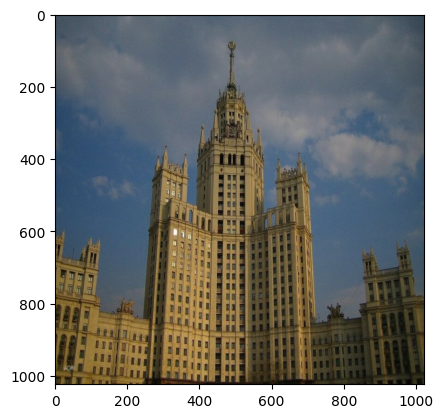

Image Size: torch.Size([1024, 1024, 3])


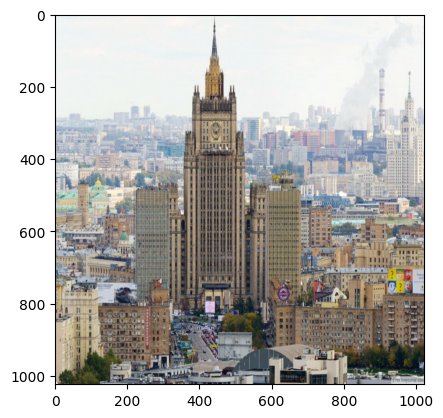

Image Size: torch.Size([1024, 1024, 3])


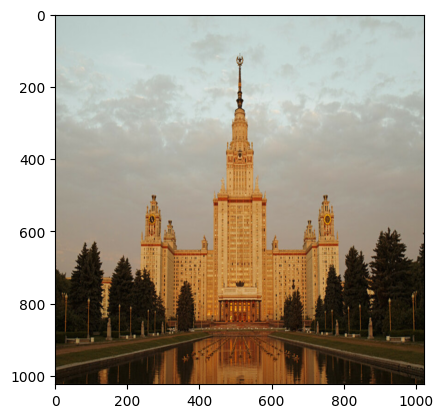

In [ ]:
batch_size = 64

train_dataset = MyIterableDataset(img_lab_train)
train_loader = DataLoader(train_dataset, batch_size=1)

test_dataset = MyIterableDataset(img_lab_test)
test_loader = DataLoader(test_dataset, batch_size=1)

for i in range(3):
  image, label = test_dataset[i]
  display(image.permute(1, 2, 0))

In [ ]:
from torchvision.models import resnet50

In [ ]:
resnet = resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 360MB/s]


In [ ]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
newmodel = torch.nn.Sequential(
    *(list(resnet.children())[:-2]),
    nn.Flatten(),
    nn.Linear(
        in_features=2048 * 32 * 32,
        out_features=1
    ),
    nn.Sigmoid()
  ).to(device)
print(newmodel)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
num_epochs = 300

train_losses = []
def train(model, dataloader):
  print("TRAINING")
  learning_rate = 1e-3
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  loss_function = nn.CrossEntropyLoss()
  model.train()

  for epoch in tqdm(range(num_epochs)):
    running_loss = 0
    for idx, (images, labels) in enumerate(train_loader):

      # print(images.shape)
      images = images.to(device)

      prediction = model(images)
      # print(prediction.shape)
      loss = loss_function(prediction,torch.Tensor([[1.0]]).to(device))
      running_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    train_losses.append(running_loss / batch_size)
    if epoch % 10 == 0:
      print(f"\nEpoch {epoch}/{num_epochs}, Loss: {running_loss / batch_size}")

def test(model, dataloader):
  print('TESTING')
  model.eval()
  with torch.no_grad():
    for idx, (images, labels) in enumerate(dataloader):
      # images = images.squeeze(1)
      images = images.to(device)
      prediction = model(images)

      print("original images")
      display(images[0].cpu().permute(1, 2, 0))
      print(prediction)
      if idx > 3: break
    print("TESTING FINISHED")

In [ ]:
# print(type(newmodel))
# print(type(train_loader))
train(newmodel, train_loader)

TRAINING


  0%|          | 1/300 [00:21<1:48:25, 21.76s/it]


Epoch 0/300, Loss: 0.0


  4%|▎         | 11/300 [02:45<1:09:47, 14.49s/it]


Epoch 10/300, Loss: 0.0


  7%|▋         | 21/300 [05:09<1:07:05, 14.43s/it]


Epoch 20/300, Loss: 0.0


 10%|█         | 31/300 [07:34<1:04:58, 14.49s/it]


Epoch 30/300, Loss: 0.0


 14%|█▎        | 41/300 [09:58<1:02:17, 14.43s/it]


Epoch 40/300, Loss: 0.0


 17%|█▋        | 51/300 [12:23<59:52, 14.43s/it]  


Epoch 50/300, Loss: 0.0


 20%|██        | 61/300 [14:47<57:29, 14.43s/it]


Epoch 60/300, Loss: 0.0


 24%|██▎       | 71/300 [17:11<55:04, 14.43s/it]


Epoch 70/300, Loss: 0.0


 27%|██▋       | 81/300 [19:35<52:40, 14.43s/it]


Epoch 80/300, Loss: 0.0


 30%|███       | 91/300 [22:00<50:16, 14.44s/it]


Epoch 90/300, Loss: 0.0


 34%|███▎      | 101/300 [24:24<47:51, 14.43s/it]


Epoch 100/300, Loss: 0.0


 37%|███▋      | 111/300 [26:48<45:26, 14.43s/it]


Epoch 110/300, Loss: 0.0


 40%|████      | 121/300 [29:13<43:02, 14.43s/it]


Epoch 120/300, Loss: 0.0


 44%|████▎     | 131/300 [31:37<40:39, 14.43s/it]


Epoch 130/300, Loss: 0.0


 47%|████▋     | 141/300 [34:01<38:15, 14.43s/it]


Epoch 140/300, Loss: 0.0


 47%|████▋     | 142/300 [34:18<38:10, 14.50s/it]


KeyboardInterrupt: ignored

TESTING
original images
Image Size: torch.Size([1024, 1024, 3])


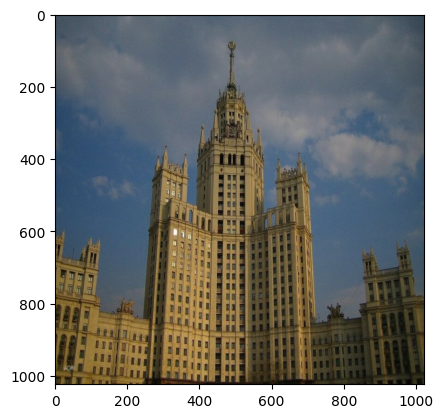

tensor([[0.5157]], device='cuda:0')
original images
Image Size: torch.Size([1024, 1024, 3])


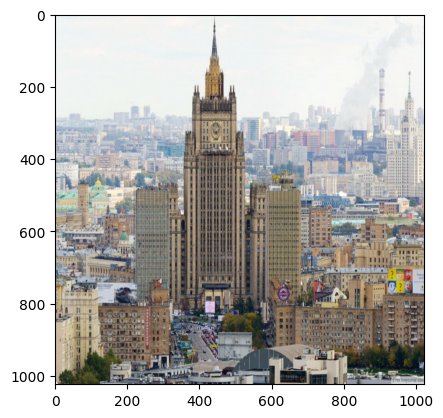

tensor([[0.4052]], device='cuda:0')
original images
Image Size: torch.Size([1024, 1024, 3])


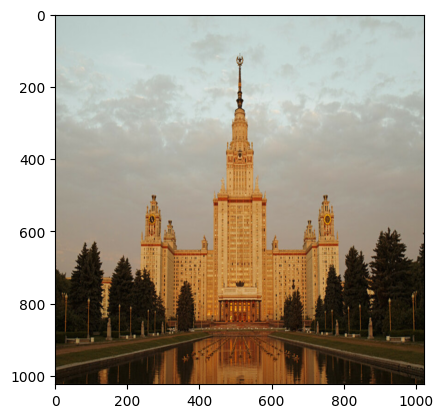

tensor([[0.4205]], device='cuda:0')
original images
Image Size: torch.Size([1024, 1024, 3])


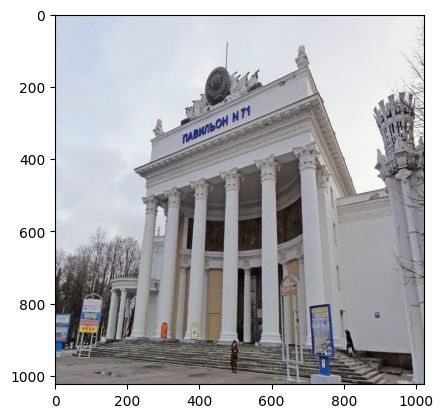

tensor([[0.7541]], device='cuda:0')
original images
Image Size: torch.Size([1024, 1024, 3])


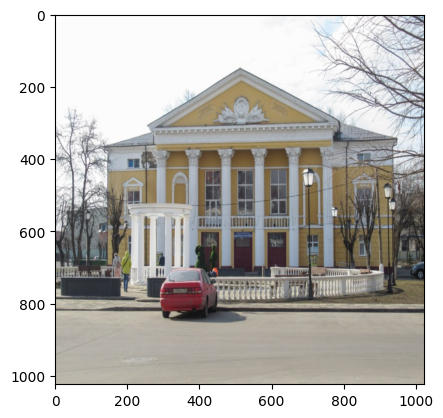

tensor([[0.4851]], device='cuda:0')
TESTING FINISHED


In [ ]:
test(newmodel, test_loader)

original images
Image Size: torch.Size([1024, 1024, 3])


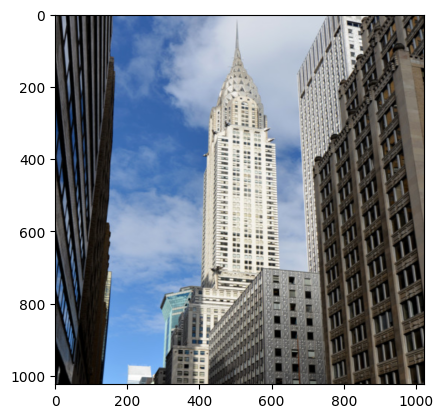

tensor([[0.5452]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [ ]:
images = img_tranform(Image.open("/content/drive/MyDrive/MIT_Project/data/chryslerbuilding.jpg")).unsqueeze(0)
images = images.to(device)
prediction = newmodel(images)

print("original images")
display(images[0].cpu().permute(1, 2, 0))
print(prediction)